In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
from PIL import Image
from matplotlib.pyplot import imshow
import pandas
import matplotlib.pylab as plt
import os
import glob
# import tensorflow

In [3]:
def show_data(data_sample, loop, class_name):
    for i in range(loop):
        image = Image.open(data_sample[i])
        plt.imshow(image)
        plt.title(f"y = {class_name}")
        plt.show()

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify the directory paths for train, valid, and test sets
train_dir = "\\Users\\Dell\\Desktop\\P1-n\\forest_fire\\train"
valid_dir = "\\Users\\Dell\\Desktop\\P1-n\\forest_fire\\valid"
test_dir = "\\Users\\Dell\\Desktop\\P1-n\\forest_fire\\testing"

# Create image generators
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

valid_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)




Found 1465 images belonging to 2 classes.
Found 367 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
# Train the model
model.fit(train_generator, epochs=3, steps_per_epoch=len(train_generator),
          validation_data=valid_generator, validation_steps=len(valid_generator))


Epoch 1/3


46/46 [==============================] - 16s 317ms/step - loss: 0.3325 - accuracy: 0.8758 - val_loss: 0.1845 - val_accuracy: 0.9346
Epoch 2/3
46/46 [==============================] - 13s 287ms/step - loss: 0.1664 - accuracy: 0.9413 - val_loss: 0.1151 - val_accuracy: 0.9646
Epoch 3/3
46/46 [==============================] - 13s 284ms/step - loss: 0.1505 - accuracy: 0.9488 - val_loss: 0.1349 - val_accuracy: 0.9619


In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


3/3 [==============================] - 0s 61ms/step - loss: 0.2517 - accuracy: 0.8971
Test Accuracy: 89.71%


In [9]:
from tensorflow.keras.preprocessing import image as image_utils
import numpy as np

# Load and preprocess a new image
new_image_path = "\\Users\\Dell\\Desktop\\P1-n\\forest_fire\\w5.jpg"
new_image = image_utils.load_img(new_image_path, target_size=(150, 150))
new_image = image_utils.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis=0)
new_image /= 255.0  # Normalize the pixel values

# Make predictions
prediction = model.predict(new_image)

# Adjusted interpretation with a threshold of 0.7
if prediction <= 0.7:
    print("Prediction: Fire Detected")
else:
    print("Prediction: No Fire Detected")


1/1 [==============================] - 0s 137ms/step
Prediction: Fire Detected


In [10]:
from tensorflow.keras.models import save_model

# Replace 'your_model' with the actual variable containing your trained model
save_model(model, '\\Users\\Dell\\Desktop\\P1-n\\forest_fire')

INFO:tensorflow:Assets written to: \Users\Dell\Desktop\P1-n\forest_fire\assets


INFO:tensorflow:Assets written to: \Users\Dell\Desktop\P1-n\forest_fire\assets


In [11]:
# Print the summary of your model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

1/1 [==============================] - 0s 51ms/step


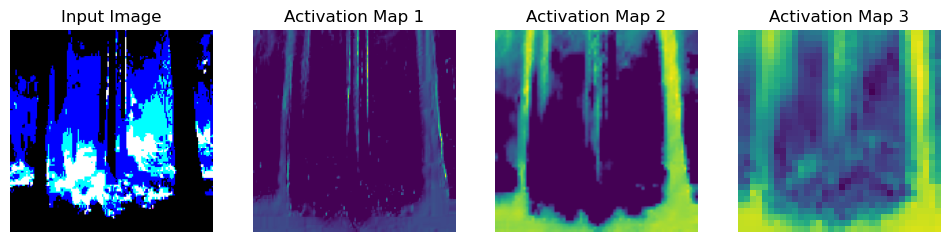

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input  # Adjust based on your model

# Assume 'model' is your trained CNN model
# Assume 'input_image_path' is the path to the image you want to visualize
input_image_path = "\\Users\\Dell\\Desktop\\P1-n\\forest_fire\\w5.jpg"  # Replace with the actual path

# Load and preprocess the input image
input_image = image_utils.load_img(input_image_path, target_size=(150, 150))  # Adjust target size based on your model
input_image = image_utils.img_to_array(input_image)
input_image = np.expand_dims(input_image, axis=0)
input_image = preprocess_input(input_image)  # Adjust preprocessing based on your model

# Print the summary of your model to identify layer names
# model.summary()

# Replace 'conv2d', 'conv2d_1', 'conv2d_2' with the actual layer names in your model
layer_names = ['conv2d', 'conv2d_1', 'conv2d_2']

# Extract feature maps from intermediate layers
intermediate_layer_models = [Model(inputs=model.input, outputs=model.get_layer(layer_name).output) for layer_name in layer_names]

# Get activations for each intermediate layer
activations = [intermediate_layer_model.predict(input_image)[0] for intermediate_layer_model in intermediate_layer_models]

# Visualize the original input image
plt.figure(figsize=(12, 4))
plt.subplot(1, len(activations) + 1, 1)
plt.imshow(input_image.reshape(150, 150, 3))  # Adjust dimensions based on your target size and channels
plt.title('Input Image')
plt.axis('off')

# Visualize activation maps for each intermediate layer
for i, activation_map in enumerate(activations):
    plt.subplot(1, len(activations) + 1, i + 2)
    plt.imshow(activation_map[:, :, 0], cmap='viridis')  # Adjust the channel index if needed
    plt.title(f'Activation Map {i + 1}')
    plt.axis('off')

plt.show()


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'model' is your trained CNN model
# Assuming 'test_generator' is your test data generator

# Make predictions on the test set
y_pred = model.predict(test_generator)

# Convert predictions to binary values (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Extract true labels from the test set
y_true = test_generator.classes

# Generate a classification report
report = classification_report(y_true, y_pred_binary)

# Print and use the report in your research paper
print("Classification Report:")
print(report)


3/3 [==============================] - 0s 79ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.36      0.36        22
           1       0.69      0.67      0.68        46

    accuracy                           0.57        68
   macro avg       0.52      0.52      0.52        68
weighted avg       0.58      0.57      0.58        68

